In [571]:
#For Data Analysis and Wrangling
import pandas as pd
import numpy as np


In [572]:
#For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [573]:
#For Machine Learning

In [574]:
from sklearn import *

In [575]:
df_train = pd.read_csv(r'C:\Users\HP\Desktop\AV\train.csv')
df_test = pd.read_csv(r'C:\Users\HP\Desktop\AV\test.csv')

df_train.shape

(245725, 11)

In [576]:
df_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [577]:
df_train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [578]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [579]:
df_train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [580]:
df_train.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [581]:
df_train.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [582]:
df_train.Vintage.value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [583]:
df_train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [584]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [585]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [586]:
df_train[['Occupation', 'Is_Lead']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Occupation,Is_Lead
0,Entrepreneur,0.660667
3,Self_Employed,0.275965
1,Other,0.244952
2,Salaried,0.159669


In [587]:
df_train[['Age', 'Is_Lead']].groupby(['Age'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Age,Is_Lead
28,51,0.378497
27,50,0.376833
31,54,0.374247
25,48,0.371894
24,47,0.369196
...,...,...
2,25,0.069154
3,26,0.065383
4,27,0.063206
1,24,0.058268


In [588]:
df_train[['Credit_Product', 'Is_Lead']].groupby(['Credit_Product'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Credit_Product,Is_Lead
1,Yes,0.314951
0,No,0.073588


In [589]:
df_train[['Is_Active', 'Is_Lead']].groupby(['Is_Active'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Is_Active,Is_Lead
1,Yes,0.282967
0,No,0.208151


In [590]:
df_train[['Gender', 'Is_Lead']].groupby(['Gender'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Gender,Is_Lead
1,Male,0.265155
0,Female,0.203581


In [591]:
df_train[['Channel_Code', 'Is_Lead']].groupby(['Channel_Code'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Channel_Code,Is_Lead
2,X3,0.367025
1,X2,0.327895
3,X4,0.247800
0,X1,0.091421


In [592]:
df_train[['Region_Code', 'Is_Lead']].groupby(['Region_Code'], as_index=False).mean().sort_values(by='Is_Lead', ascending=False)

,Region_Code,Is_Lead
33,RG283,0.302047
34,RG284,0.301035
18,RG268,0.299800
26,RG276,0.277858
3,RG253,0.258881
15,RG265,0.258732
23,RG273,0.237714
30,RG280,0.235538
5,RG255,0.232408
1,RG251,0.232101


In [593]:
df_train.describe(include=['O'])

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,3N2MSHHE,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


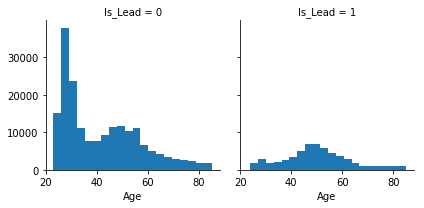

In [594]:
g = sns.FacetGrid(df_train, col='Is_Lead')
g.map(plt.hist, 'Age', bins=20)

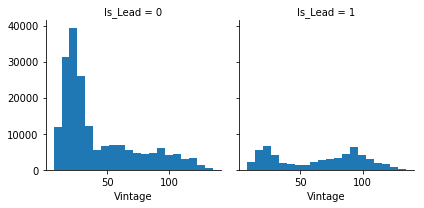

In [595]:
g1 = sns.FacetGrid(df_train, col='Is_Lead')
g1.map(plt.hist,'Vintage', bins=20)
plt.show()

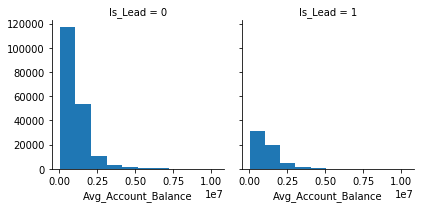

In [596]:
g2 = sns.FacetGrid(df_train, col='Is_Lead')
g2.map(plt.hist,'Avg_Account_Balance', bins=10)
plt.show()

                       Gender       Age  Region_Code  Occupation  \
Gender               1.000000 -0.152076    -0.004813    0.040397   
Age                 -0.152076  1.000000     0.117914    0.114973   
Region_Code         -0.004813  0.117914     1.000000   -0.027143   
Occupation           0.040397  0.114973    -0.027143    1.000000   
Channel_Code        -0.150586  0.605543     0.103018   -0.159348   
Credit_Product      -0.042976  0.129865     0.048206   -0.051922   
Avg_Account_Balance -0.022477  0.145232     0.076999    0.021568   
Is_Active           -0.064207  0.218770     0.059576   -0.082803   
Is_Lead             -0.072068  0.230814     0.062501   -0.063513   

                     Channel_Code  Credit_Product  Avg_Account_Balance  \
Gender                  -0.150586       -0.042976            -0.022477   
Age                      0.605543        0.129865             0.145232   
Region_Code              0.103018        0.048206             0.076999   
Occupation             

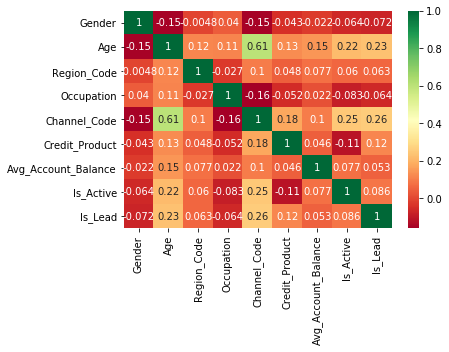

In [627]:
print(df_train.corr())
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")

In [598]:

combine = [df_train, df_test]


In [599]:
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)
    
df_train.head()    

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,1,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,1,30,RG282,Salaried,X1,33,No,886787,No,0


In [600]:
for dataset in combine:
    dataset['Occupation'] = dataset['Occupation'].map( {'Entrepreneur': 0, 'Self_Employed': 1, 'Salaried': 2, 'Other': 3} ).astype(int)
    
df_train.head() 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,X3,43,No,1045696,No,0
1,IDD62UNG,1,30,RG277,2,X1,32,No,581988,No,0
2,HD3DSEMC,1,56,RG268,1,X3,26,No,1484315,Yes,0
3,BF3NC7KV,0,34,RG270,2,X1,19,No,470454,No,0
4,TEASRWXV,1,30,RG282,2,X1,33,No,886787,No,0


In [601]:
for dataset in combine:
    dataset['Is_Active'] = dataset['Is_Active'].map( {'Yes': 1, 'No': 0} ).astype(int)
    
df_train.head() 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,X3,43,No,1045696,0,0
1,IDD62UNG,1,30,RG277,2,X1,32,No,581988,0,0
2,HD3DSEMC,1,56,RG268,1,X3,26,No,1484315,1,0
3,BF3NC7KV,0,34,RG270,2,X1,19,No,470454,0,0
4,TEASRWXV,1,30,RG282,2,X1,33,No,886787,0,0


In [602]:
for dataset in combine:
    dataset['Channel_Code'] = dataset['Channel_Code'].map( {'X1': 0, 'X2': 1, 'X3': 2, 'X4': 3} ).astype(int)
    
df_train.head() 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,2,43,No,1045696,0,0
1,IDD62UNG,1,30,RG277,2,0,32,No,581988,0,0
2,HD3DSEMC,1,56,RG268,1,2,26,No,1484315,1,0
3,BF3NC7KV,0,34,RG270,2,0,19,No,470454,0,0
4,TEASRWXV,1,30,RG282,2,0,33,No,886787,0,0


In [603]:
df_train['Credit_Product'] = df_train['Credit_Product'].replace(np.nan,'No')
df_test['Credit_Product'] = df_test['Credit_Product'].replace(np.nan,'No')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,2,43,No,1045696,0,0
1,IDD62UNG,1,30,RG277,2,0,32,No,581988,0,0
2,HD3DSEMC,1,56,RG268,1,2,26,No,1484315,1,0
3,BF3NC7KV,0,34,RG270,2,0,19,No,470454,0,0
4,TEASRWXV,1,30,RG282,2,0,33,No,886787,0,0


In [604]:
for dataset in combine:
    dataset['Credit_Product'] = dataset['Credit_Product'].map( {'Yes': 1, 'No': 0} ).astype(int)
    
df_train.head() 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,2,43,0,1045696,0,0
1,IDD62UNG,1,30,RG277,2,0,32,0,581988,0,0
2,HD3DSEMC,1,56,RG268,1,2,26,0,1484315,1,0
3,BF3NC7KV,0,34,RG270,2,0,19,0,470454,0,0
4,TEASRWXV,1,30,RG282,2,0,33,0,886787,0,0


In [605]:
df_train.drop('Vintage', axis=1, inplace=True)
df_test.drop('Vintage', axis=1, inplace=True)

df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,3,2,0,1045696,0,0
1,IDD62UNG,1,30,RG277,2,0,0,581988,0,0
2,HD3DSEMC,1,56,RG268,1,2,0,1484315,1,0
3,BF3NC7KV,0,34,RG270,2,0,0,470454,0,0
4,TEASRWXV,1,30,RG282,2,0,0,886787,0,0


In [606]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_train['Region_Code'] = LE.fit_transform(df_train['Region_Code'])

df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,18,3,2,0,1045696,0,0
1,IDD62UNG,1,30,27,2,0,0,581988,0,0
2,HD3DSEMC,1,56,18,1,2,0,1484315,1,0
3,BF3NC7KV,0,34,20,2,0,0,470454,0,0
4,TEASRWXV,1,30,32,2,0,0,886787,0,0


In [607]:
df_test['Region_Code'] = LE.fit_transform(df_test['Region_Code'])

df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,0,29,4,3,0,1,742366,0
1,CCMEWNKY,0,43,18,3,1,0,925537,0
2,VK3KGA9M,0,31,20,2,0,0,215949,0
3,TT8RPZVC,0,29,22,3,0,0,868070,0
4,SHQZEYTZ,1,29,20,3,0,0,657087,0


In [608]:
"""df_train['ID'] = df_train.ID.astype('category').cat.codes
df_test['ID'] = df_test.ID.astype('category').cat.codes

df_train.head()
df_test.head()"""

"df_train['ID'] = df_train.ID.astype('category').cat.codes\ndf_test['ID'] = df_test.ID.astype('category').cat.codes\n\ndf_train.head()\ndf_test.head()"

In [609]:


X_train = df_train.drop(["Is_Lead","ID"], axis=1)
Y_train = df_train["Is_Lead"]
X_test  = df_test.drop("ID", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((245725, 8), (245725,), (105312, 8))

In [610]:
"""logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
"""

'logreg = LogisticRegression()\nlogreg.fit(X_train, Y_train)\nY_pred = logreg.predict(X_test)\n'

In [611]:
"""acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log"""

'acc_log = round(logreg.score(X_train, Y_train) * 100, 2)\nacc_log'

In [620]:
from sklearn.ensemble import RandomForestClassifier

In [621]:
"""random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest"""

'random_forest = RandomForestClassifier(n_estimators=100)\nrandom_forest.fit(X_train, Y_train)\nY_pred = random_forest.predict(X_test)\nrandom_forest.score(X_train, Y_train)'

'acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)\nacc_random_forest'

In [623]:
"""decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree"""

99.99

In [624]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Is_Lead": Y_pred
    })

In [625]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [626]:
submission.to_csv("output2.csv", index=False)